In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
path = "/content/bank marketing dataset.csv"

In [3]:
data = pd.read_csv(path)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [17]:
missing_values = data.isnull().sum()

print(missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


The table displays summary statistics for numerical attributes of the bank marketing dataset. The 'count' row shows there are 45,211 entries for each attribute, indicating no missing values. The mean row provides the average value for each attribute, for example, the average age of clients in the dataset is approximately 40 years. The std (standard deviation) row measures the amount of variation or dispersion in the attributes; for instance, 'balance' has the highest variability with a standard deviation of over 3,044, indicating a widespread in the account balance amounts among the clients and previous has the lowest values indicating that the data points are clustered more closely around the mean. The min and max rows reveal the range of the data, from the lowest to the highest value, such as 'age' ranging from 18 to 95 years. The '25%', '50%' (median), and '75%' rows represent the quartile values, providing insights into the distribution of the data. For example, Age 25% of the individuals are younger than 33, the median age is 39, and 75% are younger than 48. the median day value is 16, suggesting that most last contacts occurred around the middle of the month. Campaign In 75% of the cases, individuals were contacted no more than 3 times

In [18]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#Some research questions are explicitly stated and appropriate for my project's objectives.
1)	What is the impact of marital status on term deposit subscriptions?

Married clients have the highest count to not to subscribe to a term deposit as it shown in the bar chart

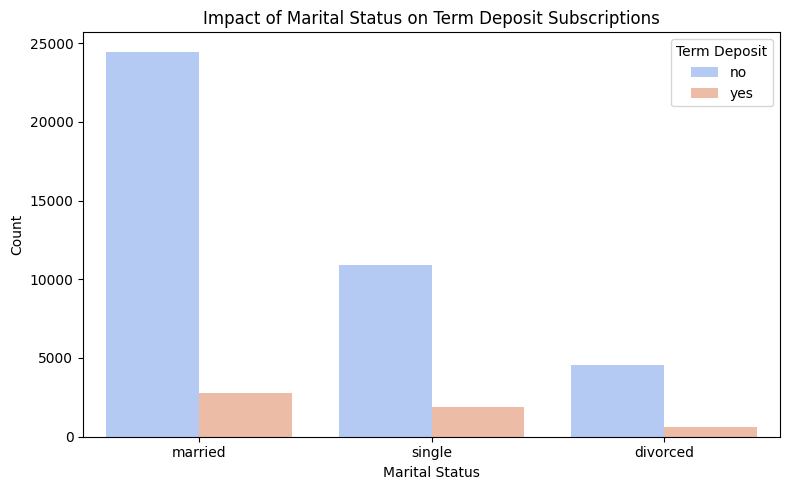

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='marital', hue='y', data=data, palette='coolwarm')
plt.title('Impact of Marital Status on Term Deposit Subscriptions')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Term Deposit', loc='upper right')
plt.tight_layout()
plt.show()

2)	How does the job type affect the likelihood of subscribing to a term deposit?

The horizontal bar charts indicates that individuals in management position are more likely to subscribe to term deposits, but students are less in numbers they have a high subscription rate in relation to their group size.

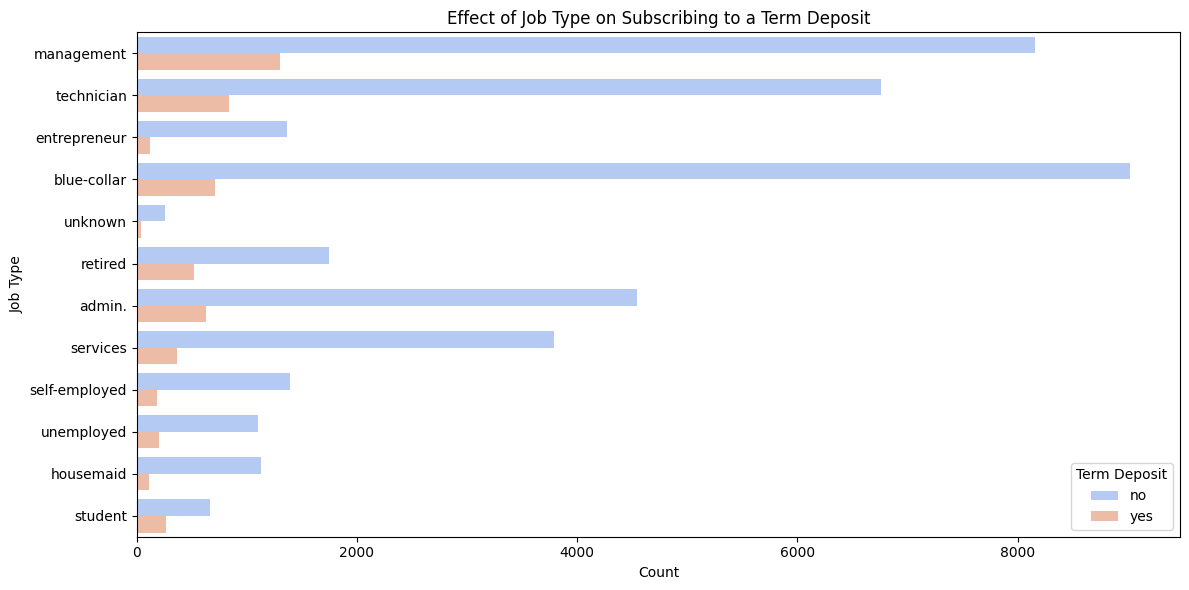

In [11]:

plt.figure(figsize=(12, 6))
sns.countplot(y='job', hue='y', data=data, palette='coolwarm')
plt.title('Effect of Job Type on Subscribing to a Term Deposit')
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.legend(title='Term Deposit', loc='lower right')
plt.tight_layout()
plt.show()

3)	How does the age distribution of clients subscribing to term deposits compare to those who do not?

The histogram indicates that consumers between the ages of 30 and 40 are more likely to subscribe to term deposits.




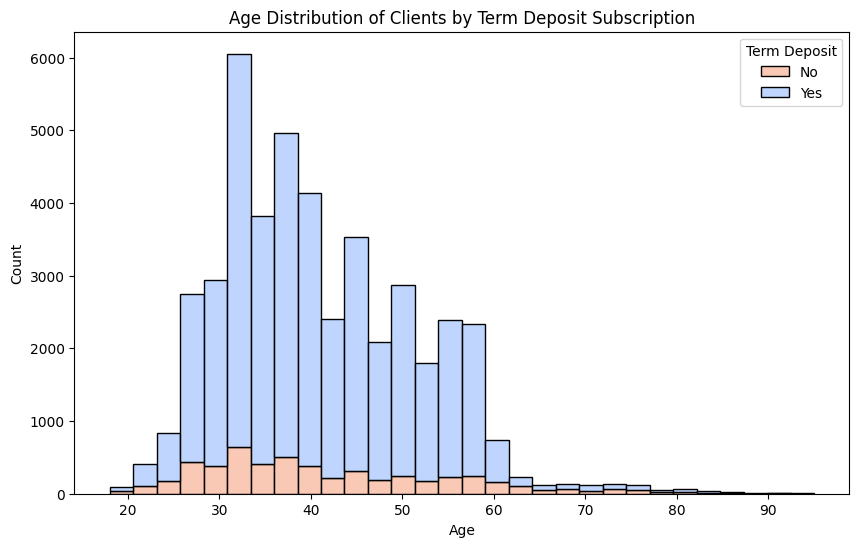

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='y', multiple='stack', palette='coolwarm', bins=30)
plt.title('Age Distribution of Clients by Term Deposit Subscription')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Term Deposit', labels=['No', 'Yes'])
plt.show()

4)	What role does education level play in the decision to subscribe to a term deposit?

The bar chart indicates clients with secondary education had a lower proportion of term deposit subscriptions compared to those with tertiary education.

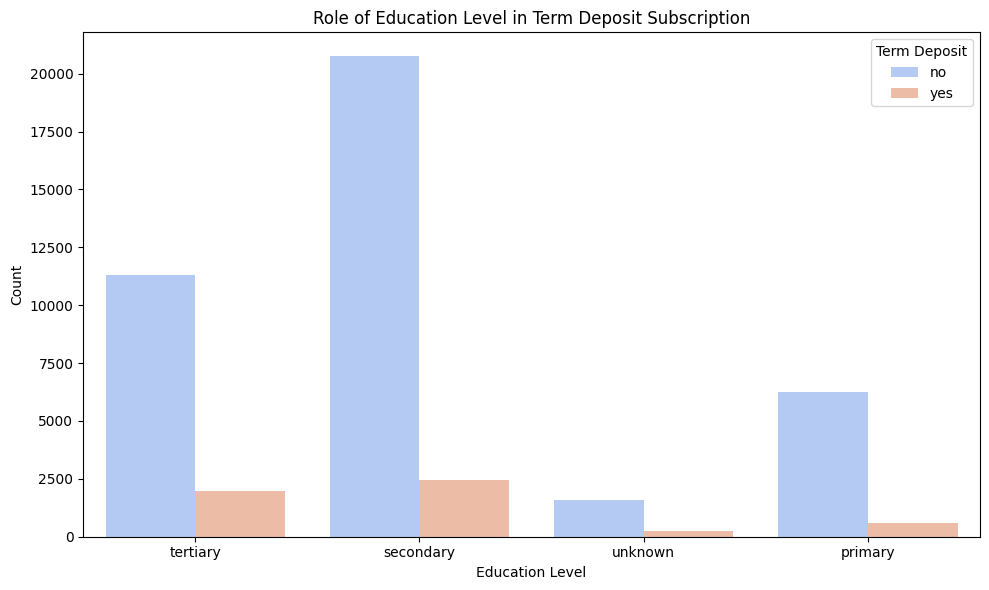

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='y', data=data, palette='coolwarm')
plt.title('Role of Education Level in Term Deposit Subscription')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Term Deposit', loc='upper right')
plt.tight_layout()
plt.show()

5) How do housing and personal loans impact the likelihood of customers subscribing to a term deposit in a banking context?"

Housing Loan Plot :
The plot illustrates that customers without housing loans tend to subscribe to term deposits more frequently than those with housing loans, suggesting that financial commitments like housing loans may impact the propensity to invest in term deposits.

Personal Loan Plot :
Similarly, the analysis shows a higher subscription rate to term deposits among customers without personal loans, indicating that the absence of additional financial burdens like personal loans could correlate with an increased likelihood of term deposit subscriptions.

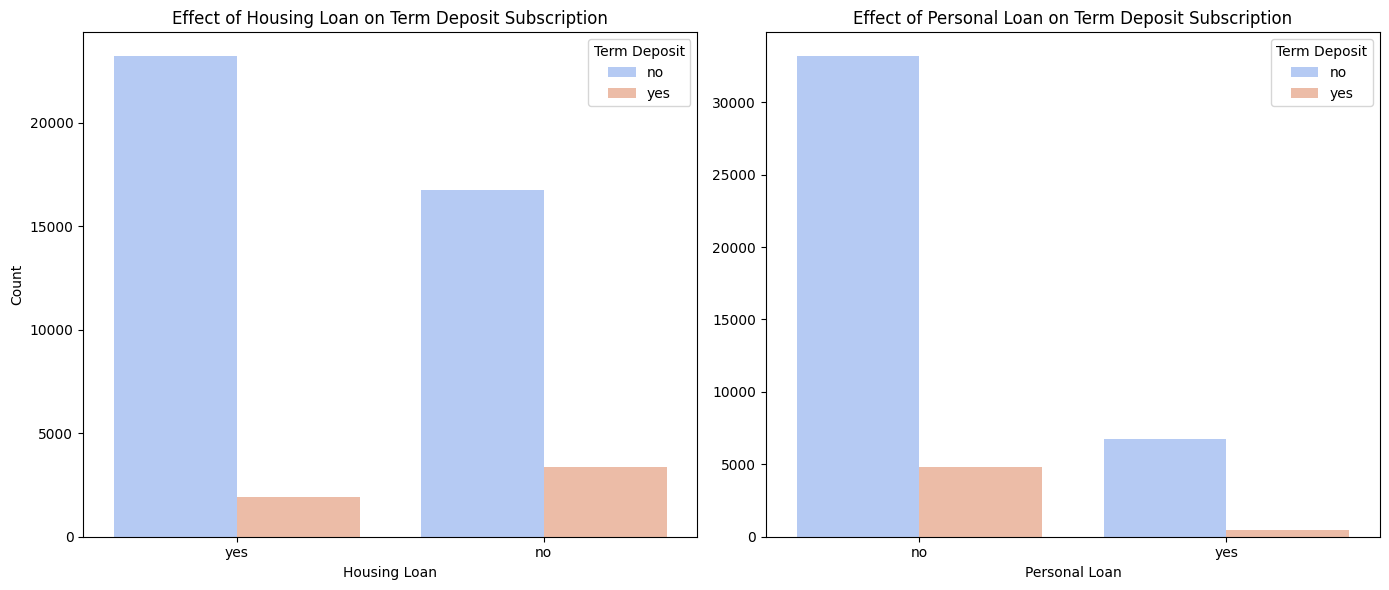

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(ax=axes[0], x='housing', hue='y', data=data, palette='coolwarm')
axes[0].set_title('Effect of Housing Loan on Term Deposit Subscription')
axes[0].set_xlabel('Housing Loan')
axes[0].set_ylabel('Count')
axes[0].legend(title='Term Deposit', loc='upper right')

sns.countplot(ax=axes[1], x='loan', hue='y', data=data, palette='coolwarm')
axes[1].set_title('Effect of Personal Loan on Term Deposit Subscription')
axes[1].set_xlabel('Personal Loan')
axes[1].set_ylabel('')
axes[1].legend(title='Term Deposit', loc='upper right')

plt.tight_layout()
plt.show()

6)How does the method of contact influence a customer's decision to subscribe to a term deposit in a bank?

 This plot reveals that the method of contact plays a significant role in term deposit subscriptions, with certain methods yielding higher subscription rates, underscoring the importance of choosing the right communication strategy to enhance customer engagement and conversion

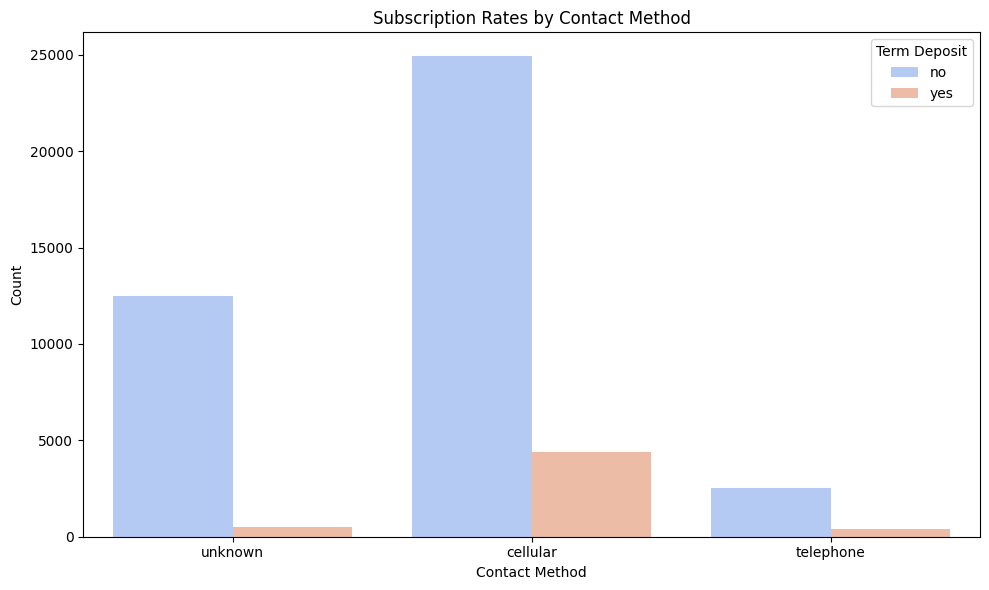

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='contact', hue='y', data=data, palette='coolwarm')
plt.title('Subscription Rates by Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.legend(title='Term Deposit', loc='upper right')
plt.tight_layout()
plt.show()

7) What is the proportion of customers subscribing to a term deposit compared to those who do not, within a banking context?

The pie chart distinctly highlights the disparity between customers who have subscribed to a term deposit and those who have not, emphasizing the challenge banks face in converting a larger segment of their clientele into term deposit subscribers.

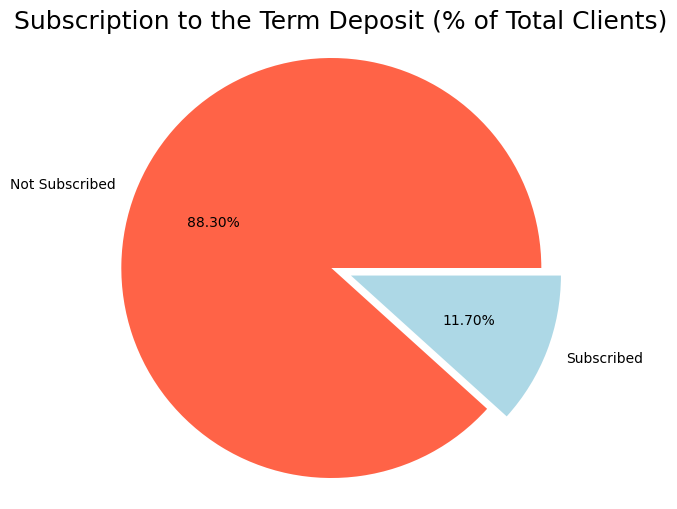

In [20]:
labels = ["Not Subscribed", "Subscribed"]
explode = (0, 0.1)  # Only "explode" the 'Subscribed' slice for emphasis

# Generate the pie chart
plt.figure(figsize=(8, 6))
plt.pie(data['y'].value_counts(), labels=labels, explode=explode, autopct='%1.2f%%', colors=['tomato', 'lightblue'])
plt.title('Subscription to the Term Deposit (% of Total Clients)', fontsize=18)
plt.axis('equal')  # Ensures the pie chart is a circle

# Display the plot
plt.show()

In [4]:
#change categorical variable to numeric variable.
categorical_cols = data.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Display the first few rows of the modified dataframe
data_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [5]:
numeric_cols = data_encoded.select_dtypes(include=['int64', 'float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
data_encoded[numeric_cols] = scaler.fit_transform(data_encoded[numeric_cols])

# Display the first few rows of the scaled dataframe
data_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,0,0,0,...,1,0,0,0,0,0,0,1,1,0


#Correlations between the variables :  
  Categorical variables are converted to numerical format using techniques like one-hot encoding to enable correlation analysis with other numerical variables, as correlation coefficients require quantitative data for calculation. This transformation allows for the assessment of relationships and dependencies between categorical and continuous variables within a dataset.

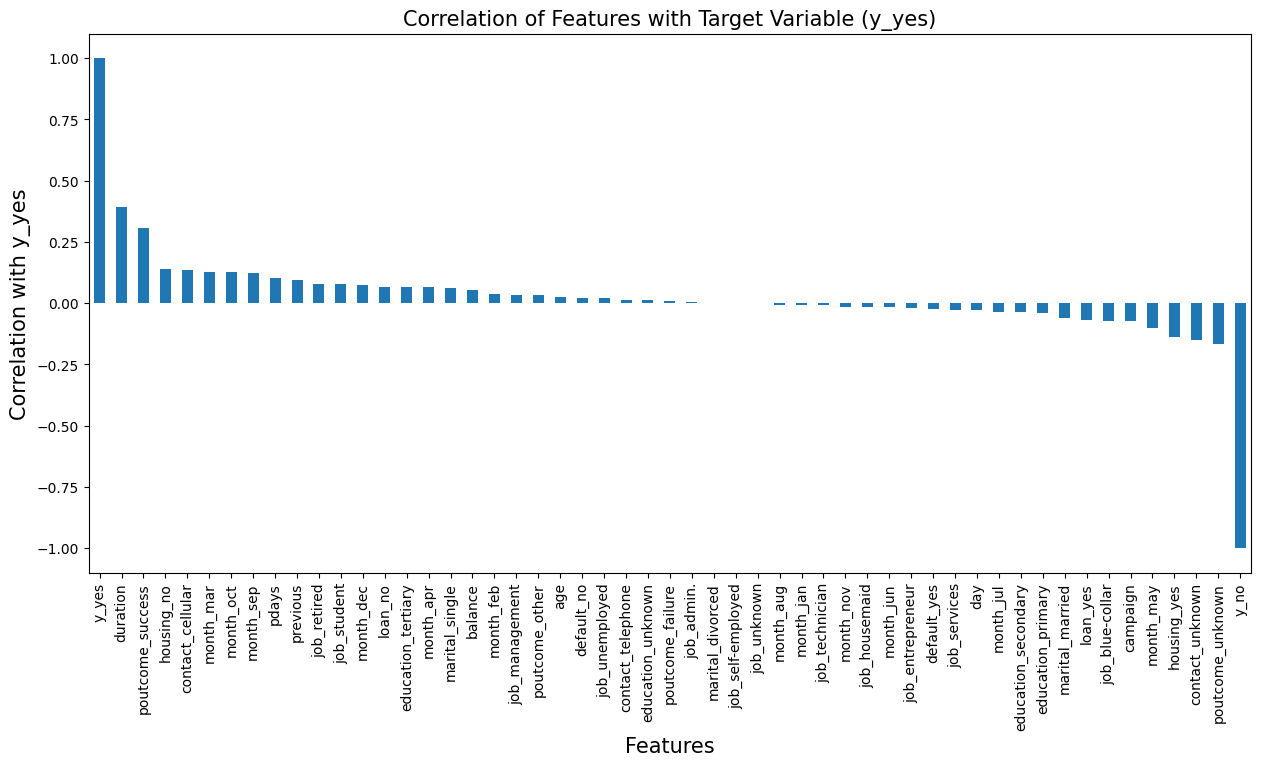

In [6]:
correlation_matrix = data_encoded.corr()

# Sort the correlation values of the target variable 'y_yes'
corr_with_target = correlation_matrix['y_yes'].sort_values(ascending=False)  # Ensure 'y_yes' matches your target variable

# Plotting the sorted correlation values
plt.figure(figsize=(15, 7))
corr_with_target.plot.bar()
plt.xlabel("Features", fontsize=15)
plt.ylabel("Correlation with y_yes", fontsize=15)  # Adjust label as per your target variable
plt.title("Correlation of Features with Target Variable (y_yes)", fontsize=15)  # Adjust title as needed
plt.show()

#


#Notes
1.	As can be seen from the plot duration is a very important feature. This is the duration of last call with client.
2.	If the call duration is more , there are higher chances of getting a yes from the client.
3.	It has been sorted in descending order.
4.	poutcome_sucess, housing_no and contact_cellular are highly correlated with y_yes
5.	poutcome_unknown, contact_unknown and housing_yes are highly correlated with y_n


#Exploring Attribute Correlations with Target Variables

<Axes: xlabel='poutcome'>

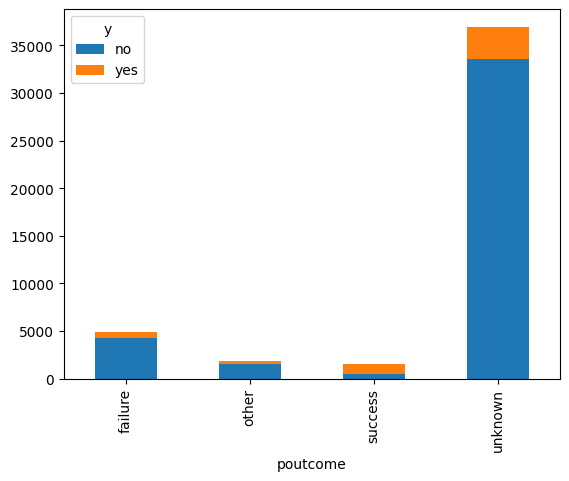

In [7]:
types = data.groupby("poutcome")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')



<Axes: xlabel='contact'>

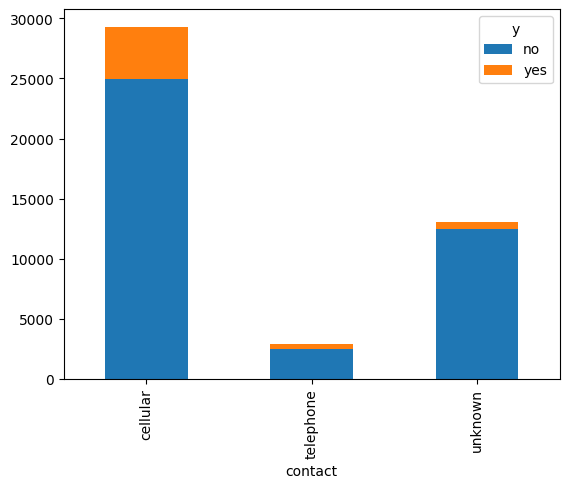

In [8]:
types = data.groupby("contact")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<Axes: xlabel='housing'>

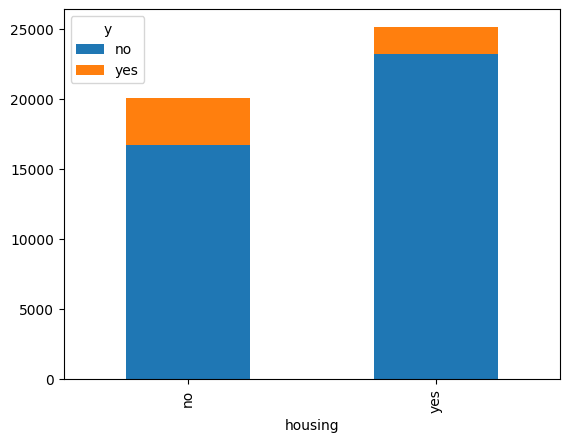

In [9]:
types = data.groupby("housing")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

